# Lib import

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from matplotlib import cm

# Загрузка данных с гугл-диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Data/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Data


In [ ]:
filename = 'Mesh_Data.txt'
df = pd.read_fwf(filename)
df.head()

,d_t_1,d_t_2,d_beam_w,d_max,Frequency (Hz),Quality factor,abs(solid.Qted) (W)
0,2.0,2.0,2.0,20000.0,147011.17422473567+4.083612473251516i,18000.137769,2.975913e-15
1,2.0,2.0,2.0,20000.0,294051.49973649+8.168423303060232i,17999.281430,1.574543e-14
2,2.0,2.0,2.0,20000.0,441153.9869320515+12.253045557488813i,18001.809626,4.405871e-14
3,2.0,2.0,2.0,20000.0,588349.4619505544+15.208032034388593i,19343.379229,9.443027e-14
4,2.0,2.0,2.0,15000.0,146464.86128810566+4.0684140138273115i,18000.240486,2.864144e-15


Округлим значения количества полос сетки до типа `int`:

In [ ]:
df.d_t_1 = df.d_t_1.round(0).astype(int)
df.d_t_2 = df.d_t_2.round(0).astype(int)
df.d_beam_w = df.d_beam_w.round(0).astype(int)
df.d_max = df.d_max.round(0).astype(int)
df.head()

,d_t_1,d_t_2,d_beam_w,d_max,Frequency (Hz),Quality factor,abs(solid.Qted) (W)
0,2,2,2,20000,147011.17422473567+4.083612473251516i,18000.137769,2.975913e-15
1,2,2,2,20000,294051.49973649+8.168423303060232i,17999.281430,1.574543e-14
2,2,2,2,20000,441153.9869320515+12.253045557488813i,18001.809626,4.405871e-14
3,2,2,2,20000,588349.4619505544+15.208032034388593i,19343.379229,9.443027e-14
4,2,2,2,15000,146464.86128810566+4.0684140138273115i,18000.240486,2.864144e-15


fig, ax = plt.subplots(nrows=1, ncols=len(indices_to_plot), figsize=(5 * len(indices_to_plot), 5))

In [ ]:
def process_data(df, num_common):
    data = []
    for index in range(df.shape[0]):
        if index % 4 == 0:
            i = 0
            row = df.iloc[index].values.flatten().tolist()
        else:
            row += df.iloc[index, num_common:].values.flatten().tolist()
        i += 1
        if i == 4:
            data.append(row)
    return data

In [ ]:
def name_data_columns(df, data, len_common):
    #len_common - число колонок, общих для всех резонансных мод
    len_differ = df.shape[1] - len_common # число различающихся колонок

    cols_common = list(df.columns)[:len_common]
    cols_differ = list(df.columns)[len_common:]
    print(len_differ, len(cols_differ))

    columns = [] # сюда будем записывать финальный вариант колонок.
    # Прим.: pandas не дает изменять колонки внутри цикла,
    # их можно изменить только единственным присваиванием
    
    # проименовываем общие колонки:
    for col_index in range(0, len_common):
        columns.append(cols_common[col_index])
    
    # проименовываем различающиеся колонки:
    for mode_index in range(1, 5):
        for col_index in range(0, len_differ):
            columns.append(f'M{mode_index} ' + cols_differ[col_index])
    data.columns = columns

    return data

In [ ]:
data = pd.DataFrame(process_data(df, num_common=4))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,2,2,20000,147011.17422473567+4.083612473251516i,18000.137769,2.975913e-15,294051.49973649+8.168423303060232i,17999.281430,1.574543e-14,441153.9869320515+12.253045557488813i,18001.809626,4.405871e-14,588349.4619505544+15.208032034388593i,19343.379229,9.443027e-14
1,2,2,2,15000,146464.86128810566+4.0684140138273115i,18000.240486,2.864144e-15,292959.02531585447+8.137405438210868i,18000.763729,1.535122e-14,439510.2417943604+12.209680707935606i,17998.433059,4.325229e-14,586153.0672062319+15.755486689894008i,18601.553819,9.240229e-14
2,2,2,2,10000,145970.9805511902+4.0546828466651235i,18000.295716,2.646598e-15,291968.7199593989+8.110216421989465i,18000.057259,1.452667e-14,438021.5880509313+12.167168307676153i,18000.145020,4.154004e-14,584157.2673342888+15.518705682148525i,18821.069208,8.966942e-14
3,2,2,3,20000,146941.08297873975+4.081698915458249i,17999.990448,2.845418e-15,293911.7745551041+8.164185921603691i,18000.066227,1.517327e-14,440944.34597443964+12.248527488471826i,17999.892085,4.267977e-14,588070.7469988922+16.327606755307542i,18008.479620,9.173304e-14
4,2,2,3,15000,146394.72106065194+4.066454535727173i,18000.289905,2.740569e-15,292819.0672986285+8.13371384532636i,18000.330038,1.478369e-14,439300.2599938339+12.202775883458433i,18000.013447,4.184388e-14,585868.0864908488+16.267181953432736i,18007.669926,9.003855e-14


In [ ]:
data = name_data_columns(df, data, len_common=4)
data.head()

3 3


,d_t_1,d_t_2,d_beam_w,d_max,M1 Frequency (Hz),M1 Quality factor,M1 abs(solid.Qted) (W),M2 Frequency (Hz),M2 Quality factor,M2 abs(solid.Qted) (W),M3 Frequency (Hz),M3 Quality factor,M3 abs(solid.Qted) (W),M4 Frequency (Hz),M4 Quality factor,M4 abs(solid.Qted) (W)
0,2,2,2,20000,147011.17422473567+4.083612473251516i,18000.137769,2.975913e-15,294051.49973649+8.168423303060232i,17999.281430,1.574543e-14,441153.9869320515+12.253045557488813i,18001.809626,4.405871e-14,588349.4619505544+15.208032034388593i,19343.379229,9.443027e-14
1,2,2,2,15000,146464.86128810566+4.0684140138273115i,18000.240486,2.864144e-15,292959.02531585447+8.137405438210868i,18000.763729,1.535122e-14,439510.2417943604+12.209680707935606i,17998.433059,4.325229e-14,586153.0672062319+15.755486689894008i,18601.553819,9.240229e-14
2,2,2,2,10000,145970.9805511902+4.0546828466651235i,18000.295716,2.646598e-15,291968.7199593989+8.110216421989465i,18000.057259,1.452667e-14,438021.5880509313+12.167168307676153i,18000.145020,4.154004e-14,584157.2673342888+15.518705682148525i,18821.069208,8.966942e-14
3,2,2,3,20000,146941.08297873975+4.081698915458249i,17999.990448,2.845418e-15,293911.7745551041+8.164185921603691i,18000.066227,1.517327e-14,440944.34597443964+12.248527488471826i,17999.892085,4.267977e-14,588070.7469988922+16.327606755307542i,18008.479620,9.173304e-14
4,2,2,3,15000,146394.72106065194+4.066454535727173i,18000.289905,2.740569e-15,292819.0672986285+8.13371384532636i,18000.330038,1.478369e-14,439300.2599938339+12.202775883458433i,18000.013447,4.184388e-14,585868.0864908488+16.267181953432736i,18007.669926,9.003855e-14


In [ ]:
x = np.unique(np.around(df.iloc[:, 1].to_numpy()).astype(int))
y = np.unique(np.around(df.iloc[:, 2].to_numpy()).astype(int))
Z = df.iloc[9:18, 4].to_numpy().reshape((3,3)) - 18000

X, Y = np.meshgrid(x, y)

print(x.shape, y.shape, z.shape)

(3,) (3,) (3, 3)


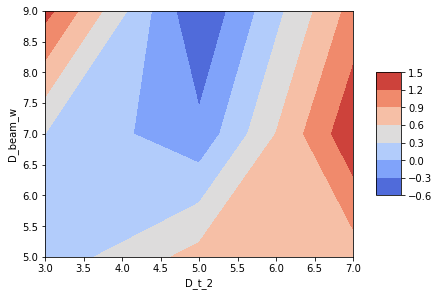

In [ ]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
cont = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel('D_t_2')
ax.set_ylabel('D_beam_w')
    
fig.colorbar(cont, shrink=0.5, aspect=5)

plt.show()

# Двумерные графики добротности

Функция для визуализации распределений:

In [67]:
def plot_Q(df, d_t_1_index):
    mode_numbers = np.array([1, 2, 3, 4]) # массив для х-значений для осей
    color_list = ['red', 'green', 'black', 'violet']

    # число уникальных значений плотности сетки
    num_1 = len(pd.unique(df['d_t_2']))
    num_2 = len(pd.unique(df['d_beam_w']))
    num_3 = len(pd.unique(df['d_max']))

    # построение сетки графиков
    fig, ax = plt.subplots(nrows=num_1, ncols=num_2, figsize=(5 * num_2, 5 * num_1))
    d_max_index = 0
    for i in range(0, num_1):
        for j in range(0, num_2):
            for k in range(0, num_3):
                ax[i, j].plot(mode_numbers, df.iloc[d_t_1_index * int(df.shape[0]/3) + d_max_index, [5, 8, 11, 14]]-18000, color=color_list[k], label=f'D_max = {df.iloc[d_t_1_index * int(df.shape[0]/3) + d_max_index, 3]}')
                ax[i, j].set_yscale('symlog')
                ax[i, j].set_xticks(range(1,5))
                ax[i, j].set_title(f"D_t_2 = {df.iloc[d_t_1_index * int(df.shape[0]/3) + d_max_index, 1]}; D_beam_w = {df.iloc[d_t_1_index * int(df.shape[0]/3) + d_max_index, 2]}")
                ax[i, j].legend()
                d_max_index += 1
    plt.show()

Визуализация со значением `d_t_1 = 2`:

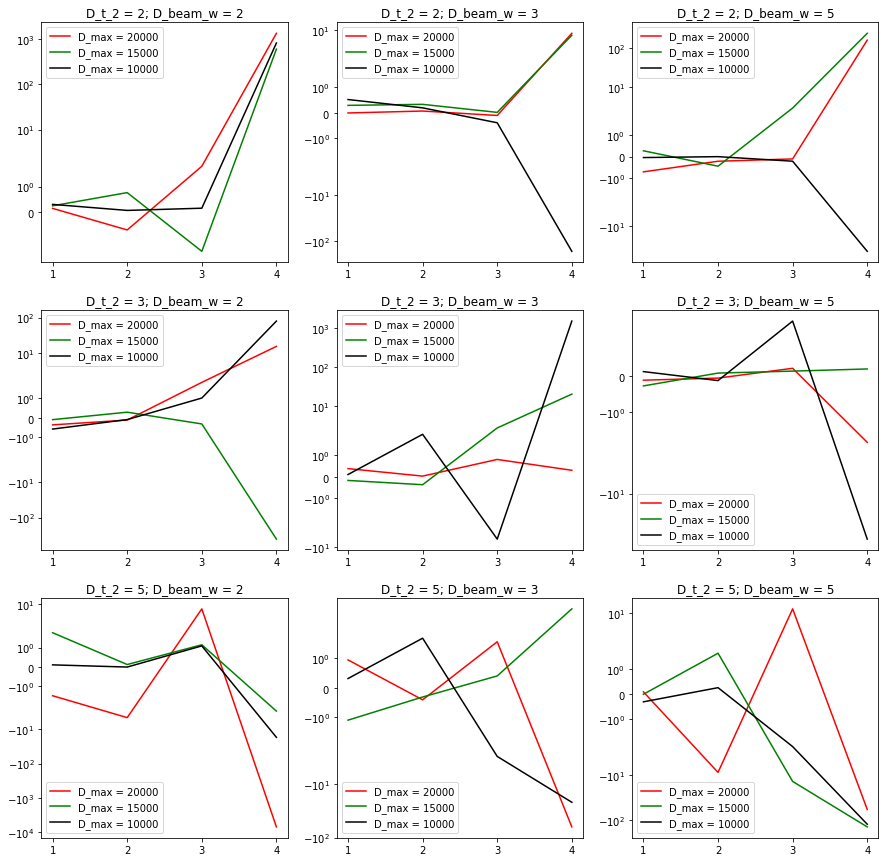

In [68]:
plot_Q(data, d_t_1_index=0)

Визуализация со значением `d_t_1 = 3`:

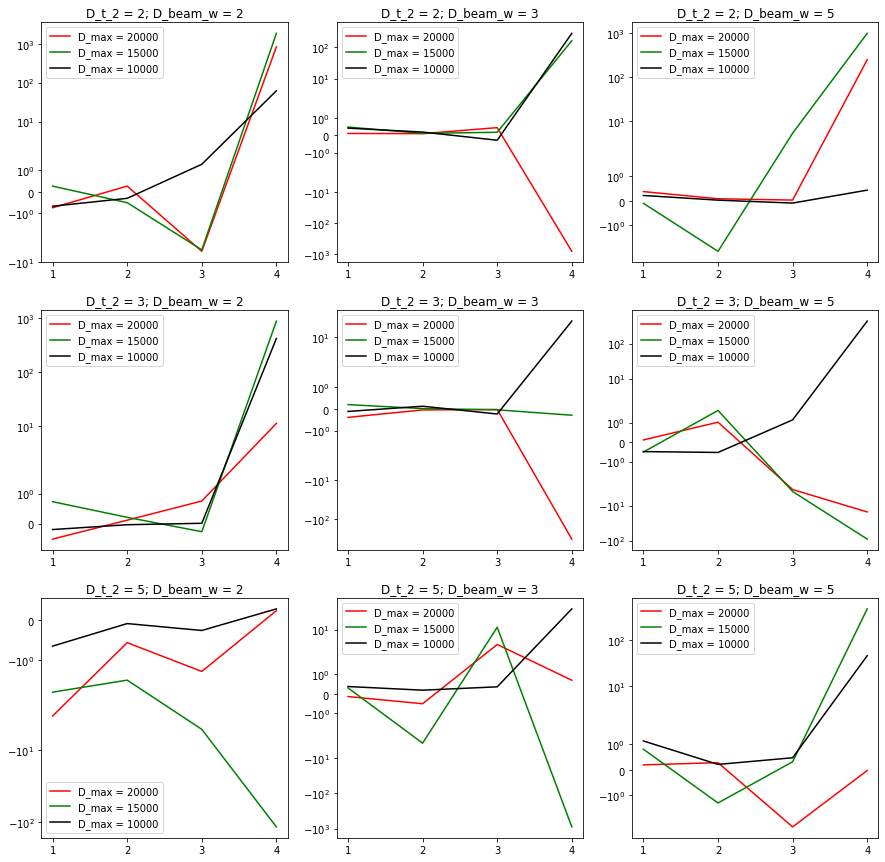

In [69]:
plot_Q(data, d_t_1_index=1)

Визуализация со значением `d_t_1 = 5`:

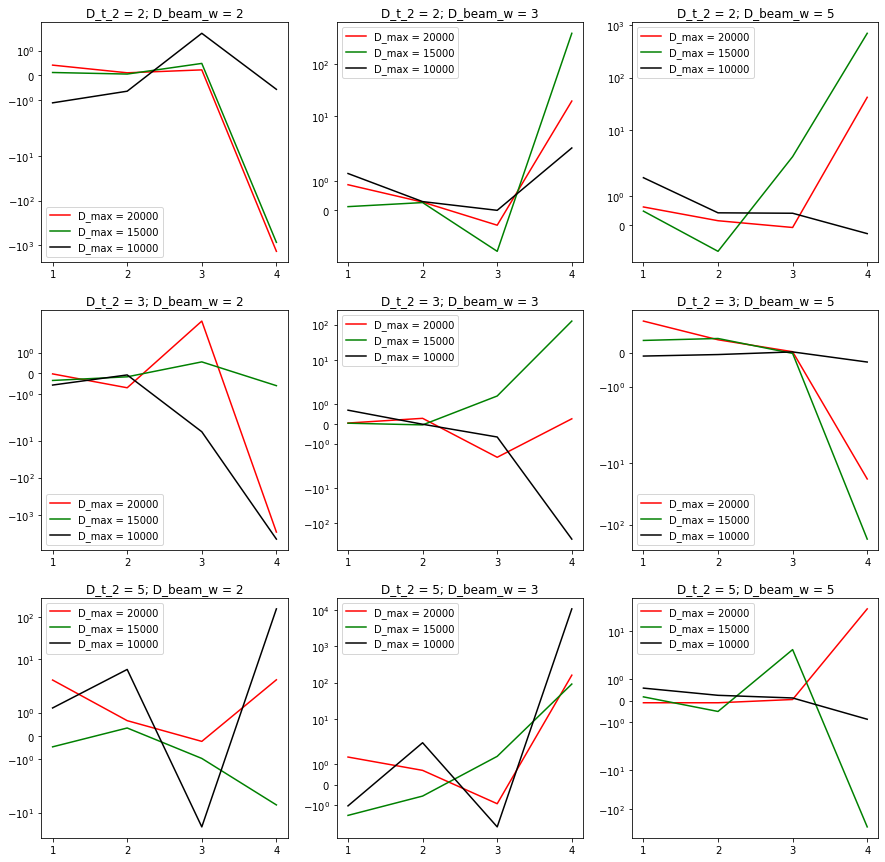

In [70]:
plot_Q(data, d_t_1_index=2)

## D_t_1 = 3

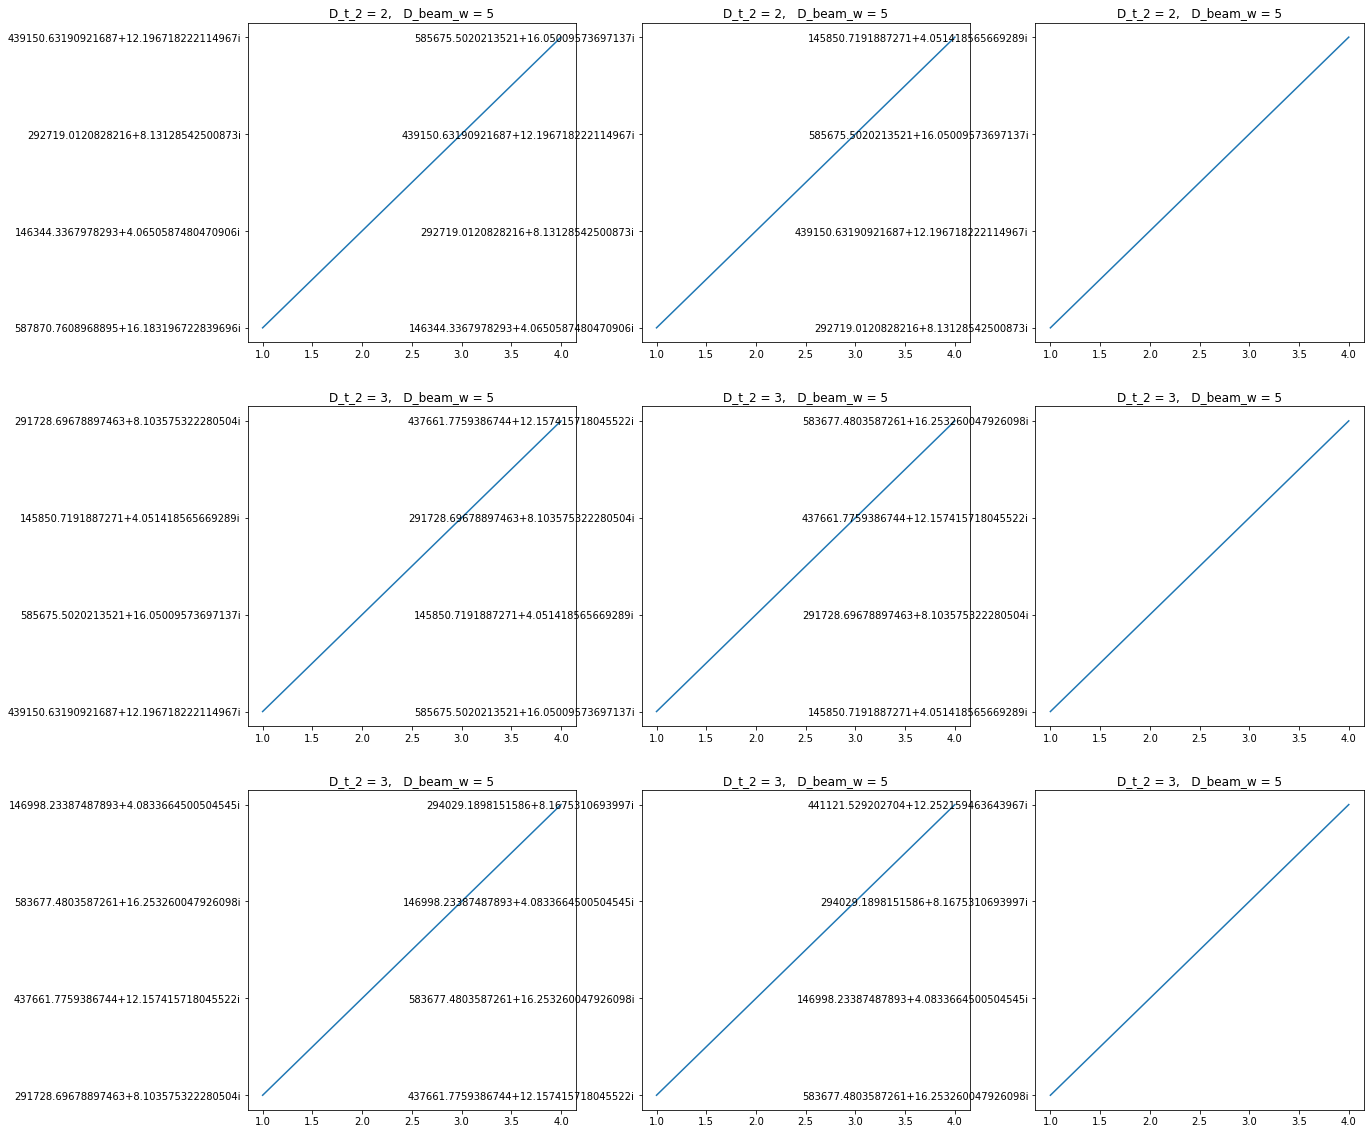

In [72]:
mode_numbers = np.array([1, 2, 3, 4])
fig, ax = plt.subplots(ncols=3, nrows=3)
k = 0
for i in range(0, 3):
    for j in range(0, 3):
        ax[i,j].plot(mode_numbers, df.iloc[27+k:27+k+4, 4])
        ax[i,j].set_title(f"D_t_2 = {df.iloc[27+i*12, 1]},   D_beam_w = {df.iloc[27+j*4, 2]}")
        k += 1
plt.rcParams["figure.figsize"] = (20,20)
plt.show()